In [1]:
!pip install Pillow
!pip install rasterio
!pip install segmentation_models
!pip install mat4py
!apt install octave

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 39.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aglfn epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts
  imagemagick-6-common info install-info libamd2 libauthen-sasl-perl libcamd2
  libccolamd2 libcholmod3 libcolamd2 libcxsparse3 libdata-dump-perl libemf1
  lib

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import tensorflow as tf
import cv2
import os,re
import rasterio
from random import randint
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.plot import show, show_hist
from keras.layers import Input
from sklearn.model_selection import train_test_split
import sys,traceback
from mat4py import savemat

Mounted at /content/drive/


In [3]:
tifpath = "/content/drive/MyDrive/dataset/images/"
bmppath = "/content/drive/MyDrive/dataset/mask/"
bmpfol = []
tiffol=[]
for image in os.listdir(tifpath):
    tiffol.append(image)
for _ in os.listdir(bmppath):
  bmpfol.append(_)


#To change between images, change from here
"""from skimage import io,transform,exposure
import os

# set the new image size
new_size = (512, 512)

# set the directory path
dir_path = 'D:/smoke/tif and bmp/images/'

# loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.tif'):
        # read the image
        img = io.imread(os.path.join(dir_path, filename))

        # resize the image
        resized_img = transform.resize(img, new_size)
        #adjjust the contrast
        adjusted_img = exposure.rescale_intensity(resized_img, in_range=(0, 1))
        # save the resized image
        io.imsave(os.path.join(dir_path, filename), adjusted_img)
"""


bmpd = bmppath + bmpfol[1]
tifd = tifpath + tiffol[1]
print("Sample .bmp file directory:\n",bmpd)
print('\nInstances of Mask Dataset:',len(bmpfol))
print('\nInstances of Raster Image Dataset:',len(tiffol))

Sample .bmp file directory:
 /content/drive/MyDrive/dataset/mask/time-20192422210192-loc--119.2_37.6_-118.28_38.8.bmp

Instances of Mask Dataset: 352

Instances of Raster Image Dataset: 352


In [4]:
srb = rasterio.open(bmpd)
#Rasterio Color Interpretation of .bmp Image
print("Rasterio Colormap object created for .bmp file:\n",srb.colormap,"\n\nRasterio ColorInterp object created for .bmp file:\n",srb.colorinterp)

Rasterio Colormap object created for .bmp file:
 <built-in method colormap of DatasetReader object at 0x7f3b59bcbe40> 

Rasterio ColorInterp object created for .bmp file:
 (<ColorInterp.palette: 2>,)


/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Width:66, Height:110



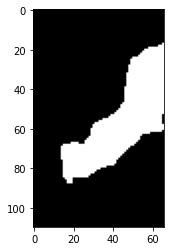

In [5]:
plt.imshow(srb.read(1), cmap='gray')
print(f"Width:{srb.width}, Height:{srb.height}\n")
plt.show()

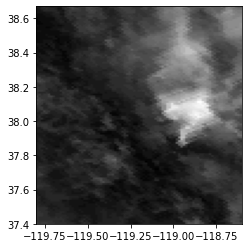

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f3b56f1b440>


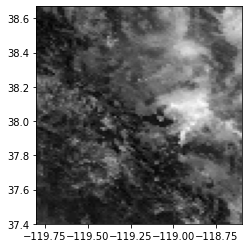

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f3b56f1b440>


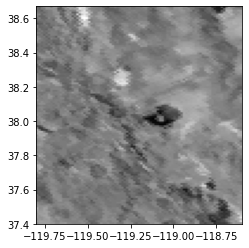

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f3b56f1b440>


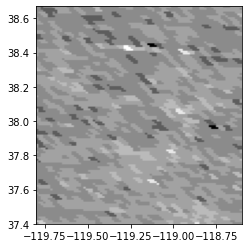

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f3b56f1b440>


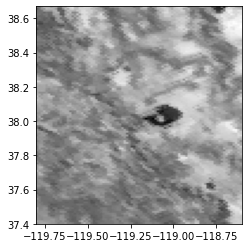

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f3b56f1b440>


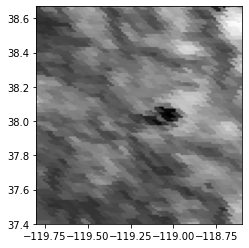

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f3b56f1b440>


In [6]:
srt = rasterio.open(tifd)
for _ in range(1,7):
  try:
    show(srt.read(_),transform=srt.transform,cmap='gray')
    print(srt.colorinterp)
    print(srt.colormap)
  except IndexError:
    break

In [7]:
srt.descriptions #No descriptions given on the rasters

(None, None, None, None, None, None)

In [8]:
path = tifpath + '/' + tiffol[1]
with rasterio.open(path) as src:
    tifa = src.read()
    meta = src.meta
    #Tagged Raster Image into N-Dimensional Array
    print("Matrix Representation of .tif image:\n")
    print(tifa,"\n\nDatatype:",tifa.dtype)

Matrix Representation of .tif image:

[[[57 57 59 ... 69 68 68]
  [56 57 59 ... 71 70 70]
  [56 56 57 ... 72 72 72]
  ...
  [61 60 60 ... 64 64 63]
  [61 61 61 ... 64 64 61]
  [62 61 62 ... 65 65 64]]

 [[38 40 45 ... 58 56 56]
  [37 38 40 ... 59 60 59]
  [36 39 38 ... 62 68 65]
  ...
  [40 41 40 ... 56 53 48]
  [48 42 41 ... 57 59 48]
  [42 43 45 ... 58 56 54]]

 [[56 56 63 ... 61 59 59]
  [61 56 63 ... 66 66 65]
  [59 59 55 ... 70 74 74]
  ...
  [70 73 71 ... 79 79 85]
  [74 76 76 ... 71 79 97]
  [69 75 75 ... 72 72 72]]

 [[ 7  7  5 ...  8  8  8]
  [ 7  7  5 ...  8  8  7]
  [ 7  7  7 ...  8  8  8]
  ...
  [ 7  7  8 ...  8  8  8]
  [10 10 10 ...  8  8  8]
  [ 7 10 10 ...  7  7  7]]

 [[43 43 54 ... 62 59 59]
  [35 43 54 ... 69 67 66]
  [41 41 43 ... 73 77 77]
  ...
  [51 51 49 ... 71 71 69]
  [59 57 57 ... 69 71 70]
  [53 57 58 ... 71 71 70]]

 [[31 31 43 ... 63 52 52]
  [31 31 43 ... 65 65 58]
  [31 31 31 ... 65 65 65]
  ...
  [35 35 35 ... 56 56 56]
  [39 39 39 ... 52 56 56]
  [39 

In [9]:
print("Matrix Representation of .bmp file\n")
bmpa = np.array(srb.read(1))
#Bitmap Image into N-Dimensional array
print(bmpa,"\n\nDatatype:",bmpa.dtype)

Matrix Representation of .bmp file

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Datatype: uint8


In [10]:
meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 87,
 'height': 117,
 'count': 6,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.013793103448275895, 0.0, -119.8,
        0.0, -0.010854700854700881, 38.67)}

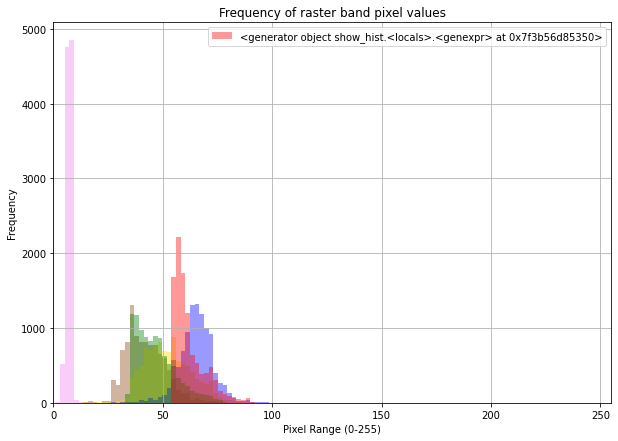

In [11]:
(axrgb, axhist) = plt.subplots(1, 1, figsize=(10,7))
show_hist(
    tifa, bins=50, lw=0.0, stacked=False, alpha=0.4,
    histtype='stepfilled', title="Histogram",ax=axhist)
plt.xlim(xmin=0, xmax = 255)
axhist.set_xlabel('Pixel Range (0-255)')
axhist.set_title("Frequency of raster band pixel values")
plt.show()

The fourth raster seems to stand out from the other five rasters and the first raster also shows some level of promise.

In [12]:
#Upload nasameta.m and show the .tif image's description
%%writefile

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [ ]:
!octave -W nasameta.m

In [ ]:
print("Dimensions of .tif image:",tifa.shape)
print("\nMetadata:\n",meta)

In [14]:
print("Dimensions of .bmp image:",bmpa.shape)

Dimensions of .bmp image: (110, 66)


In [15]:
Y = []
for path in bmpfol:
  imgy = cv2.imread(os.path.join(bmppath,path))
  Y.append(imgy)

In [16]:
X = []
for path in tiffol:
  with rasterio.open(os.path.join(tifpath,path)) as srt:
    imgx = srt.read()
    print("Raster Image Metadata",srt.meta,'\n')
  X.append(imgx)

Raster Image Metadata {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 66, 'height': 110, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.013939393939393965, 0.0, -119.2,
       0.0, -0.01090909090909087, 38.8)} 

Raster Image Metadata {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 87, 'height': 117, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.013793103448275895, 0.0, -119.8,
       0.0, -0.010854700854700881, 38.67)} 

Raster Image Metadata {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 124, 'height': 161, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.012903225806451682, 0.0, -83.7,
       0.0, -0.010869565217391304, 33.75)} 

Raster Image Metadata {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 68, 'height': 92, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.014705882352941176, 0.0, -107.1,
       0.0, -0.010869565217391304, 42.7)} 

Raster Image Metadata {'driver':

In [17]:
for i in range(0,len(X)):
  print("Shape of Raster Image:",X[i].shape,"\n")
  print("Shape of Mask Image",Y[i].shape,'\n')

Shape of Raster Image: (6, 110, 66) 

Shape of Mask Image (117, 87, 3) 

Shape of Raster Image: (6, 117, 87) 

Shape of Mask Image (110, 66, 3) 

Shape of Raster Image: (6, 161, 124) 

Shape of Mask Image (120, 169, 3) 

Shape of Raster Image: (6, 92, 68) 

Shape of Mask Image (305, 135, 3) 

Shape of Raster Image: (6, 386, 231) 

Shape of Mask Image (120, 126, 3) 

Shape of Raster Image: (6, 101, 99) 

Shape of Mask Image (101, 99, 3) 

Shape of Raster Image: (6, 120, 126) 

Shape of Mask Image (161, 124, 3) 

Shape of Raster Image: (6, 120, 169) 

Shape of Mask Image (386, 231, 3) 

Shape of Raster Image: (6, 305, 135) 

Shape of Mask Image (92, 68, 3) 

Shape of Raster Image: (6, 392, 299) 

Shape of Mask Image (392, 299, 3) 

Shape of Raster Image: (6, 147, 169) 

Shape of Mask Image (92, 94, 3) 

Shape of Raster Image: (6, 120, 121) 

Shape of Mask Image (120, 121, 3) 

Shape of Raster Image: (6, 92, 94) 

Shape of Mask Image (147, 169, 3) 

Shape of Raster Image: (6, 294, 89) 

S

In [18]:
rastcols = ['TiffHeight','TiffWidth','BmpHeight','BmpWidth']
rastframe = pd.DataFrame(columns = rastcols)
for i in range(0,len(X)):
    rastframe.loc[len(rastframe.index)]=[X[i].shape[1],X[i].shape[2],Y[i].shape[0],Y[i].shape[1]]
rastframe

,TiffHeight,TiffWidth,BmpHeight,BmpWidth
0,110,66,117,87
1,117,87,110,66
2,161,124,120,169
3,92,68,305,135
4,386,231,120,126
...,...,...,...,...
347,83,82,83,82
348,231,167,231,167
349,55,47,55,47
350,46,52,46,52


In [28]:
print("Maximum .tif Height =",rastframe['TiffHeight'].max(),"\nMaximum .tif Width = ",rastframe['TiffWidth'].max())

Maximum .tif Height = 1572 
Maximum .tif Width =  7080


In [29]:
print("Minimum .tif Height =",rastframe['TiffHeight'].min(),"\nMinimum .tif Width = ",rastframe['TiffWidth'].min())

Minimum .tif Height = 18 
Minimum .tif Width =  21


In [30]:
print("Maximum .bmp height =",rastframe['BmpHeight'].max(),"\nMaximum .bmp Width = ",rastframe['BmpWidth'].max())

Maximum .bmp height = 1572 
Maximum .bmp Width =  7080


In [31]:
print("Minimum .bmp Height =",rastframe['TiffHeight'].min(),"\nMinimum .bmp Width = ",rastframe['TiffWidth'].min())

Minimum .bmp Height = 18 
Minimum .bmp Width =  21


In [19]:
rastframe.loc[:,['TiffHeight','TiffWidth']].value_counts

<bound method DataFrame.value_counts of     TiffHeight TiffWidth
0          110        66
1          117        87
2          161       124
3           92        68
4          386       231
..         ...       ...
347         83        82
348        231       167
349         55        47
350         46        52
351        397       352

[352 rows x 2 columns]>

In [20]:
rastframe.loc[:,['BmpHeight','BmpWidth']].value_counts

<bound method DataFrame.value_counts of     BmpHeight BmpWidth
0         117       87
1         110       66
2         120      169
3         305      135
4         120      126
..        ...      ...
347        83       82
348       231      167
349        55       47
350        46       52
351       397      352

[352 rows x 2 columns]>

This means there is no common pattern of pixel dimensions in the images.

In [ ]:
#npy converted images
tifpypat = "/content/drive/MyDrive/numpy/images/"
bmppypat = "/content/drive/MyDrive/numpy/masks/"
bmppyfol = []
tifpyfol=[]
for image in os.listdir(tifpypat):
    tifpyfol.append(image)
for _ in os.listdir(bmppypat):
  bmppyfol.append(_)

In [ ]:
np.load(os.path.join(tifpypat,tifpyfol[0]))

In [ ]:
np.load(os.path.join(bmppypat,bmppyfol[0])).shape

In [ ]:
np.load(os.path.join(bmppypat,bmppyfol[0])).shape

In [ ]:
Xpy = []
for path in tifpyfol:
  imgpx = np.load(os.path.join(tifpypat,path)).reshape(256,256,6)
  imgpx = imgpx[:,:,0]
  Xpy.append(imgpx)

In [ ]:
Ypy = []
for path in bmppyfol:
  imgpy = np.load(os.path.join(bmppypat,path))
  Ypy.append(imgy)

In [ ]:
Xpy[0].shape

In [ ]:
Ypy[0].shape

In [ ]:
"""#just in case scaling function
from skimage import io,transform,exposure
import os

# set the new image size
new_size = (512, 512)

# set the directory path
#dir_path = 'D:/smoke/tif and bmp/images/'

# loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.tif'):
        # read the image
        img = io.imread(os.path.join(dir_path, filename))

        # resize the image
        resized_img = transform.resize(img, new_size)
        #adjjust the contrast
        adjusted_img = exposure.rescale_intensity(resized_img, in_range=(0, 1))
        # save the resized image
        io.imsave(os.path.join(dir_path, filename), adjusted_img)"""

# Ideas
Do we need to scale the images? Do we need to try a different model? Padding?? Change the Strides??
<br>Should we identify "Normalized Difference Haze Index"?
<br>Add MATLAB *'imfinfo'* functionality as well.


In [ ]:
#U-Net Model
try:
    inputs = tf.keras.layers.Input((256, 256,1))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
    #Contraction Path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansion Path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    
    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(3, (1, 1), activation='softmax')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    ble = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print(exc_type, ble,"\n\nFound at Line",exc_tb.tb_lineno)
    print("\n\n⚠ ⚠ ⚠ ⚠\n\n",traceback.format_exc(),"\n⚠ ⚠ ⚠ ⚠")

In [ ]:
"""from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.models import Model

# Input layer
inputs = Input((256,256, 1))

# Encoder section
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

# Bottleneck
conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)

# Decoder section
up1 = UpSampling2D(size=(2, 2))(conv4)
merge1 = concatenate([conv3, up1], axis=-1)
conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge1)
up2 = UpSampling2D(size=(2, 2))(conv5)
merge2 = concatenate([conv2, up2], axis=-1)
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge2)
up3 = UpSampling2D(size=(2, 2))(conv6)
merge3 = concatenate([conv1, up3], axis=-1)
conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge3)

# Output layer
outputs = Conv2D(3, (1, 1), activation='softmax')(conv7)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()"""

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(Xpy,Ypy,test_size=0.2,random_state=5)

In [ ]:
model.fit(xtrain[0:100],ytrain[0:100])
#Data Cardinality is Ambiguous